# Import Libraries to Use

In [ ]:
# 
# Import library modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
# 
# Label Encoder and Scaling Classes
from sklearn.preprocessing import LabelEncoder, StandardScaler
# 
# Class for splitting datasets
from sklearn.model_selection import train_test_split
# 
# Classes for accessing different models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# 
# Classes for evaluating models
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score    # ROC Curve (Receiver Operating Characteristic)

# Load Data

In [168]:
# 
# Load dataset
loan_eligibility_df = pd.read_csv('../data/loan_data.csv')

In [169]:
# 
# View DataFrame sample
loan_eligibility_df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
195,LP001665,Male,Yes,1,Graduate,No,3125,2583.0,170.0,360.0,1.0,Semiurban,N
450,LP002446,Male,Yes,2,Not Graduate,No,2309,1255.0,125.0,360.0,0.0,Rural,N
458,LP002472,Male,No,2,Graduate,No,4354,0.0,136.0,360.0,1.0,Rural,Y
585,LP002912,Male,Yes,1,Graduate,No,4283,3000.0,172.0,84.0,1.0,Rural,N
358,LP002158,Male,Yes,0,Not Graduate,No,3000,1666.0,100.0,480.0,0.0,Urban,N
39,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban,Y
336,LP002110,Male,Yes,1,Graduate,NaN,5250,688.0,160.0,360.0,1.0,Rural,Y
551,LP002784,Male,Yes,1,Not Graduate,No,2492,2375.0,NaN,360.0,1.0,Rural,Y
198,LP001671,Female,Yes,0,Graduate,No,3416,2816.0,113.0,360.0,NaN,Semiurban,Y
468,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y


In [170]:
# 
# Get basic statistics of the DataFrame
# 
# View DataFrame sample
loan_eligibility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# 1. Data Preprocessing

## 1.1. Plot Distributions

### 1.1.1. Check for Normality in Distributions

#### 1.1.1.1. Histograms for Numerical Columns

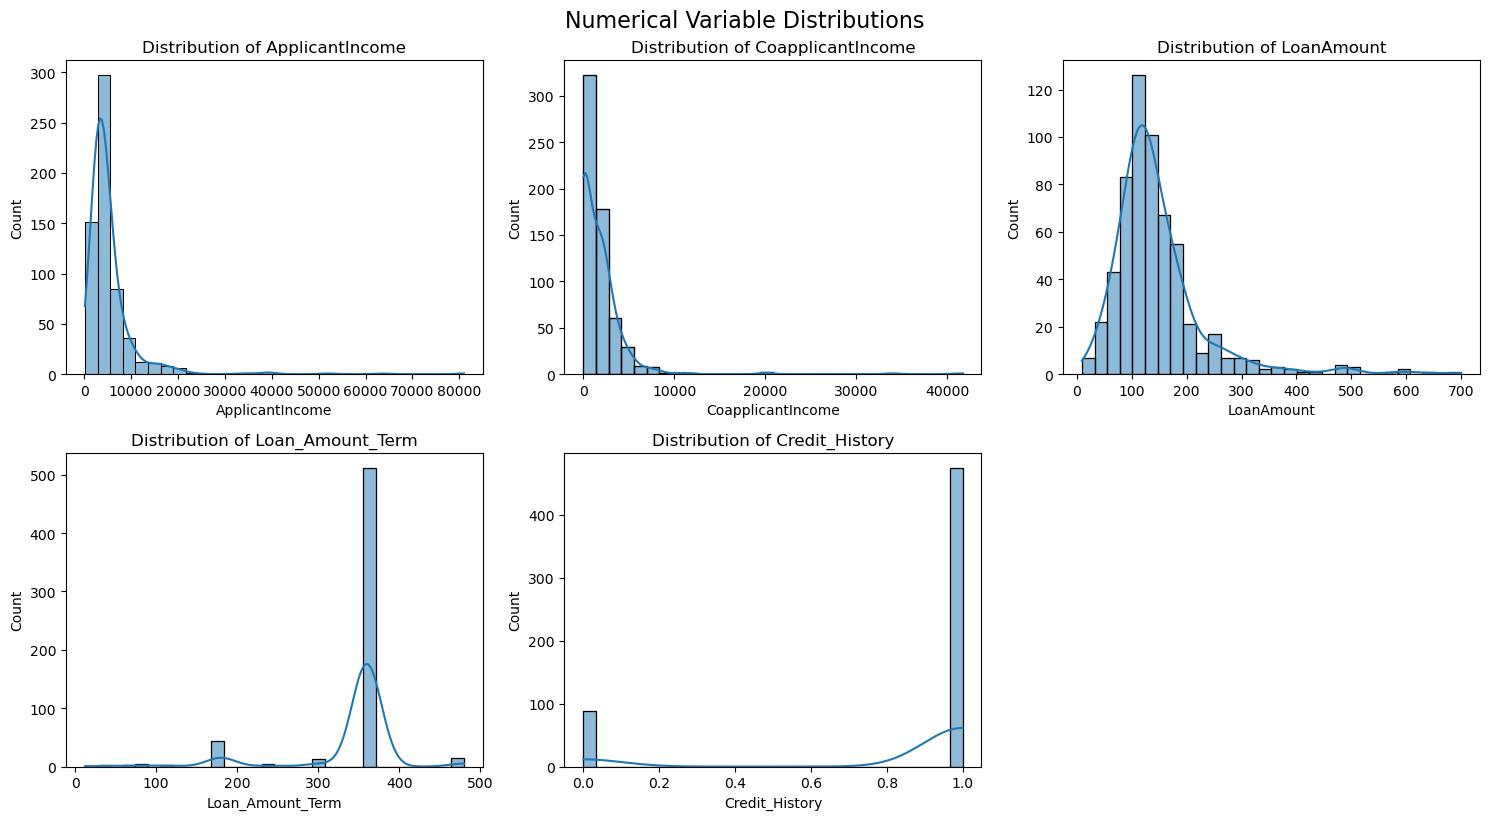

In [171]:
# 
# Get the numeric columns names in an index (an array like object)
numerical_cols = loan_eligibility_df.select_dtypes(include='number').columns
# 
# Get the count of the numeric columns
n = len(numerical_cols)
# 
# Number of plots per row
cols = 3
rows = math.ceil(n / cols)
# 
# Instantiating the figure object (blank canvas that is a grid of subplots)
plt.figure(figsize = (cols * 5, rows * 4))
# 
#  loop through numeric column names in the index object and keep track of their index 
for j, col in enumerate(numerical_cols, 1):    # Subplot positions start at 1 not 0
    # 
    # Place the next plot in position j inside a grid of rows x cols plots.
    plt.subplot(rows, cols, j)
    sns.histplot(
        loan_eligibility_df[col],
        kde = True,
        bins = 30
    )
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.suptitle("Numerical Variable Distributions", fontsize=16, y=1.02)
plt.show()

#### 1.1.1.2. Count Plots for Categorical Columns

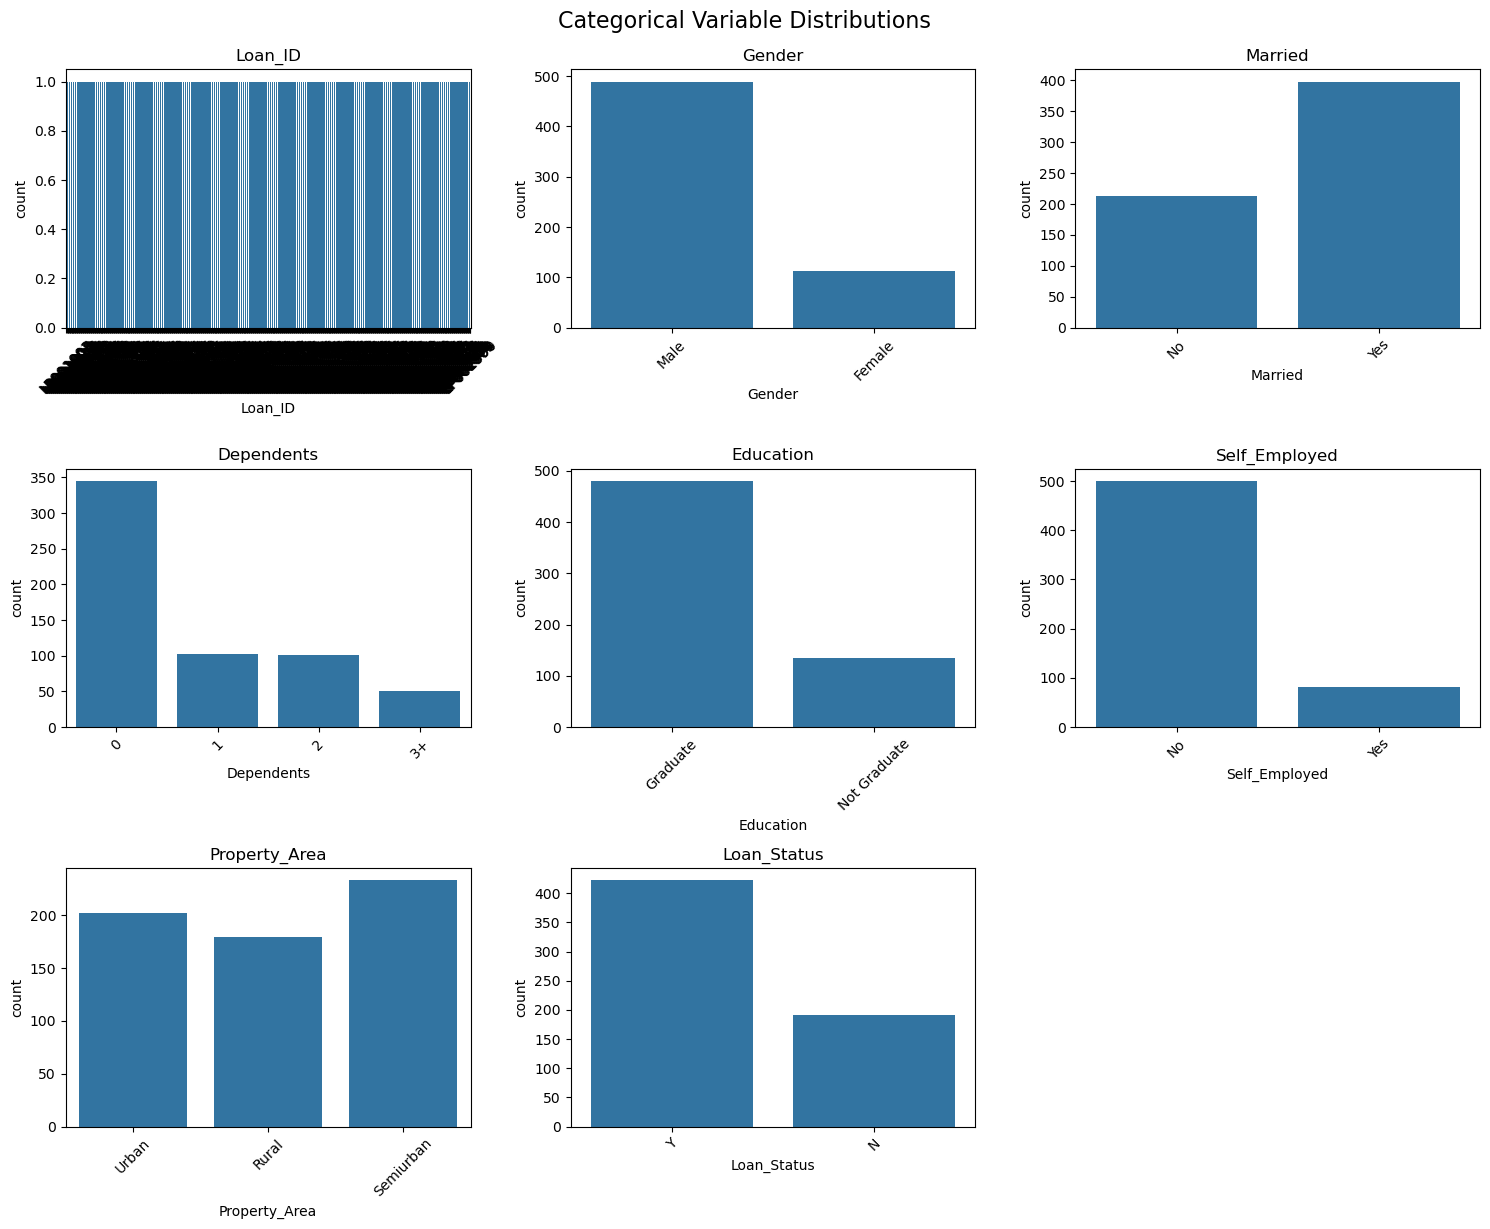

In [172]:
categorical_cols = loan_eligibility_df.select_dtypes(include='object').columns
n = len(categorical_cols)
# 
# Number of columns in the grid.
cols = 3
rows = math.ceil(n / cols)
# 
# Instantiate the figure object.
plt.figure(figsize=(cols * 5, rows * 4))
# 
# Loop through the categorical columns inside the index object
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(
        data = loan_eligibility_df,
        x = col
    )
    plt.title(col)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle("Categorical Variable Distributions", fontsize=16, y=1.02)
plt.show()

## 1.2. Handling Outliers

NB: If we don't handle outliers, then our imputation will be distoreted (i.e., If you have outliers before imputation, the mean will be very high or low, and your filled values will be unrealistic.)

        Skewness Value    Interpretation	                  Direction
        
        ≈ 0	              Normal distribution (symmetric)	  None
        
        0 to ±0.5	      Fairly symmetrical                  None
        
        ±0.5 to ±1.0      Moderate skew                       Right/Left
        
        ±1.0 to ±2.0      Highly skewed                       Right/Left
        
        > ±2.0            Very highly skewed                  Right/Left

In [173]:
# 
# Get the skewness of each plot
# 
# Loop through the numerical columns to get the skew of each distribution
for col in numerical_cols:
    skew_value = loan_eligibility_df[col].skew()
    print(f"Skewness of '{col}': {skew_value:.2f}")

Skewness of 'ApplicantIncome': 6.54
Skewness of 'CoapplicantIncome': 7.49
Skewness of 'LoanAmount': 2.68
Skewness of 'Loan_Amount_Term': -2.36
Skewness of 'Credit_History': -1.88


NB: For Highly Skewed data, we use log transformation (it doesn't remove data points but rather transforms them i.e., by compressing the larger values and expanding the smaller values, thus reducing the skewness of the data. ) while IQR is for moderate to high skewness

In [174]:
# 
# Loop through the numerical columns and transform the outliers
# Loan_Amount_Term has very few unique values hence can be categorical
# Credit History is binary, hence can be treated categorically
# 
# Columns to log transform
cols_to_log = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
# 
# Loop through the column names and transform their data
for col in cols_to_log:
    loan_eligibility_df[col] = loan_eligibility_df[col].apply(lambda row_val: np.log1p(row_val))
# 
# Check skewness after log transforming
for col in numerical_cols:
    skew_value = loan_eligibility_df[col].skew()
    print(f"Skewness of '{col}': {skew_value:.2f}")

Skewness of 'ApplicantIncome': 0.48
Skewness of 'CoapplicantIncome': -0.17
Skewness of 'LoanAmount': -0.15
Skewness of 'Loan_Amount_Term': -2.36
Skewness of 'Credit_History': -1.88


## 1.3. Impute Null Values

In [175]:
# 
# Check for number of missing values for each column
loan_eligibility_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Percentage of null values compared to total rows

Gender - 2.12%

Married - 0.49%

Dependents - 2.44% 

Self_Employed - 5.21%

LoanAmount - 3.58%

Loan_Amount_Term - 2.28%

Credit_History - 8.14%


For numeric columns:

1. Normal distribution - impute with mean (LoanAmount)
2. Skewed distribution (even those with outliers) - impute with median 

For categorical columns we use mode or 'unknown' (Gender, Married, Dependants, Self_Employed, Loan_Amount_Term, Credit_History)

For columns with time or sequence data we use ffill or bfill

In [176]:
# 
# Impute 'Gender' column with mode
loan_eligibility_df['Gender'] = loan_eligibility_df['Gender'].fillna(loan_eligibility_df['Gender'].mode()[0])
# 
# Impute 'Married' column with mode
loan_eligibility_df['Married'] = loan_eligibility_df['Married'].fillna(loan_eligibility_df['Married'].mode()[0])
# 
# Remove '+' sign to have consistency i.e., '3+' to '3'
loan_eligibility_df['Dependents'] = loan_eligibility_df['Dependents'].replace('3+', '3').astype(float)
# 
# Impute 'Dependents' column with median since mean will give a float (e.g., there can't be 3.6 dependents) and mode can be zero hence skewing it toward that end
loan_eligibility_df['Dependents'] = loan_eligibility_df['Dependents'].fillna(loan_eligibility_df['Dependents'].median())
# 
# Impute 'Dependents' column with mode
loan_eligibility_df['Self_Employed'] = loan_eligibility_df['Self_Employed'].fillna(loan_eligibility_df['Self_Employed'].mode()[0])
# 
# Impute 'LoanAmount' column with median
loan_eligibility_df['LoanAmount'] = loan_eligibility_df['LoanAmount'].fillna(loan_eligibility_df['LoanAmount'].median())
# 
# Impute 'Loan_Amount_Term' column with mode
loan_eligibility_df['Loan_Amount_Term'] = loan_eligibility_df['Loan_Amount_Term'].fillna(loan_eligibility_df['Loan_Amount_Term'].mode()[0])
# 
# Impute 'Credit_History' column with 'unknown' because there's a possibility of not knowing an applicant's credit history
loan_eligibility_df['Credit_History'] = loan_eligibility_df['Credit_History'].fillna('unknown')

In [177]:
# 
# Check for null values after impiutation
loan_eligibility_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [178]:
# 
# Check for the unique values of Dependents column
loan_eligibility_df['Dependents'].unique()

array([0., 1., 2., 3.])

## 1.4. Encoding for Chosen Categorical Features

In [179]:
# 
# Drop Loan_ID
loan_eligibility_df = loan_eligibility_df.drop('Loan_ID', axis=1)
loan_eligibility_df.sample(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
397,Male,Yes,0.0,Graduate,No,8.017637,7.286192,4.564348,360.0,1.0,Urban,Y
88,Male,No,0.0,Graduate,No,9.055673,0.000000,5.351858,360.0,1.0,Urban,Y
62,Male,Yes,0.0,Not Graduate,Yes,7.867106,8.146130,5.111988,180.0,0.0,Rural,N


In [180]:
# 
# Check for categorical columns
loan_eligibility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [181]:
# 
# Instantiate Label Encoder
lbl_encoder = LabelEncoder()
# Since Label Encoder by default assigns labels alphabetically (e.g., 'Graduate' = 0 and 'Not Graduate' = 1) we first map the values to (e.g., 'B_Graduate' = 0 and 'A_Not Graduate')
loan_eligibility_df['Education'] = loan_eligibility_df['Education'].map({
    'Graduate': 'B_Graduate',
    'Not Graduate': 'A_Not Graduate'
})
loan_eligibility_df['Education'] = lbl_encoder.fit_transform(loan_eligibility_df['Education'])
loan_eligibility_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,1,No,8.674197,0.000000,4.859812,360.0,1.0,Urban,Y
1,Male,Yes,1.0,1,No,8.430327,7.319202,4.859812,360.0,1.0,Rural,N
2,Male,Yes,0.0,1,Yes,8.006701,0.000000,4.204693,360.0,1.0,Urban,Y
3,Male,Yes,0.0,0,No,7.857094,7.765993,4.795791,360.0,1.0,Urban,Y
4,Male,No,0.0,1,No,8.699681,0.000000,4.955827,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,1,No,7.972811,0.000000,4.276666,360.0,1.0,Rural,Y
610,Male,Yes,3.0,1,No,8.320448,0.000000,3.713572,180.0,1.0,Rural,Y
611,Male,Yes,1.0,1,No,8.996280,5.484797,5.537334,360.0,1.0,Urban,Y
612,Male,Yes,2.0,1,No,8.933796,0.000000,5.236442,360.0,1.0,Urban,Y


In [182]:
loan_eligibility_df = pd.get_dummies(loan_eligibility_df, columns=['Gender'], prefix = 'Gender', dtype = int)
loan_eligibility_df = pd.get_dummies(loan_eligibility_df, columns = ['Married'], prefix = 'Married', dtype = int)
# loan_eligibility_df = pd.get_dummies(loan_eligibility_df, columns=['Education'], prefix = 'Education', dtype = int)
loan_eligibility_df = pd.get_dummies(loan_eligibility_df, columns = ['Self_Employed'], prefix = 'Self_Employed', dtype = int)
loan_eligibility_df = pd.get_dummies(loan_eligibility_df, columns = ['Credit_History'], prefix = 'Credit_History', dtype = int)
loan_eligibility_df = pd.get_dummies(loan_eligibility_df, columns = ['Property_Area'], prefix = 'Property_Area', dtype = int)
loan_eligibility_df = pd.get_dummies(loan_eligibility_df, columns = ['Loan_Status'], prefix = 'Loan_Status', dtype = int)
loan_eligibility_df

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Credit_History_unknown,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0.0,1,8.674197,0.000000,4.859812,360.0,0,1,1,0,1,0,0,1,0,0,0,1,0,1
1,1.0,1,8.430327,7.319202,4.859812,360.0,0,1,0,1,1,0,0,1,0,1,0,0,1,0
2,0.0,1,8.006701,0.000000,4.204693,360.0,0,1,0,1,0,1,0,1,0,0,0,1,0,1
3,0.0,0,7.857094,7.765993,4.795791,360.0,0,1,0,1,1,0,0,1,0,0,0,1,0,1
4,0.0,1,8.699681,0.000000,4.955827,360.0,0,1,1,0,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,1,7.972811,0.000000,4.276666,360.0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
610,3.0,1,8.320448,0.000000,3.713572,180.0,0,1,0,1,1,0,0,1,0,1,0,0,0,1
611,1.0,1,8.996280,5.484797,5.537334,360.0,0,1,0,1,1,0,0,1,0,0,0,1,0,1
612,2.0,1,8.933796,0.000000,5.236442,360.0,0,1,0,1,1,0,0,1,0,0,0,1,0,1


## 1.5. Correlation between features

In [183]:
loan_eligibility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    float64
 1   Education                614 non-null    int64  
 2   ApplicantIncome          614 non-null    float64
 3   CoapplicantIncome        614 non-null    float64
 4   LoanAmount               614 non-null    float64
 5   Loan_Amount_Term         614 non-null    float64
 6   Gender_Female            614 non-null    int64  
 7   Gender_Male              614 non-null    int64  
 8   Married_No               614 non-null    int64  
 9   Married_Yes              614 non-null    int64  
 10  Self_Employed_No         614 non-null    int64  
 11  Self_Employed_Yes        614 non-null    int64  
 12  Credit_History_0.0       614 non-null    int64  
 13  Credit_History_1.0       614 non-null    int64  
 14  Credit_History_unknown   6

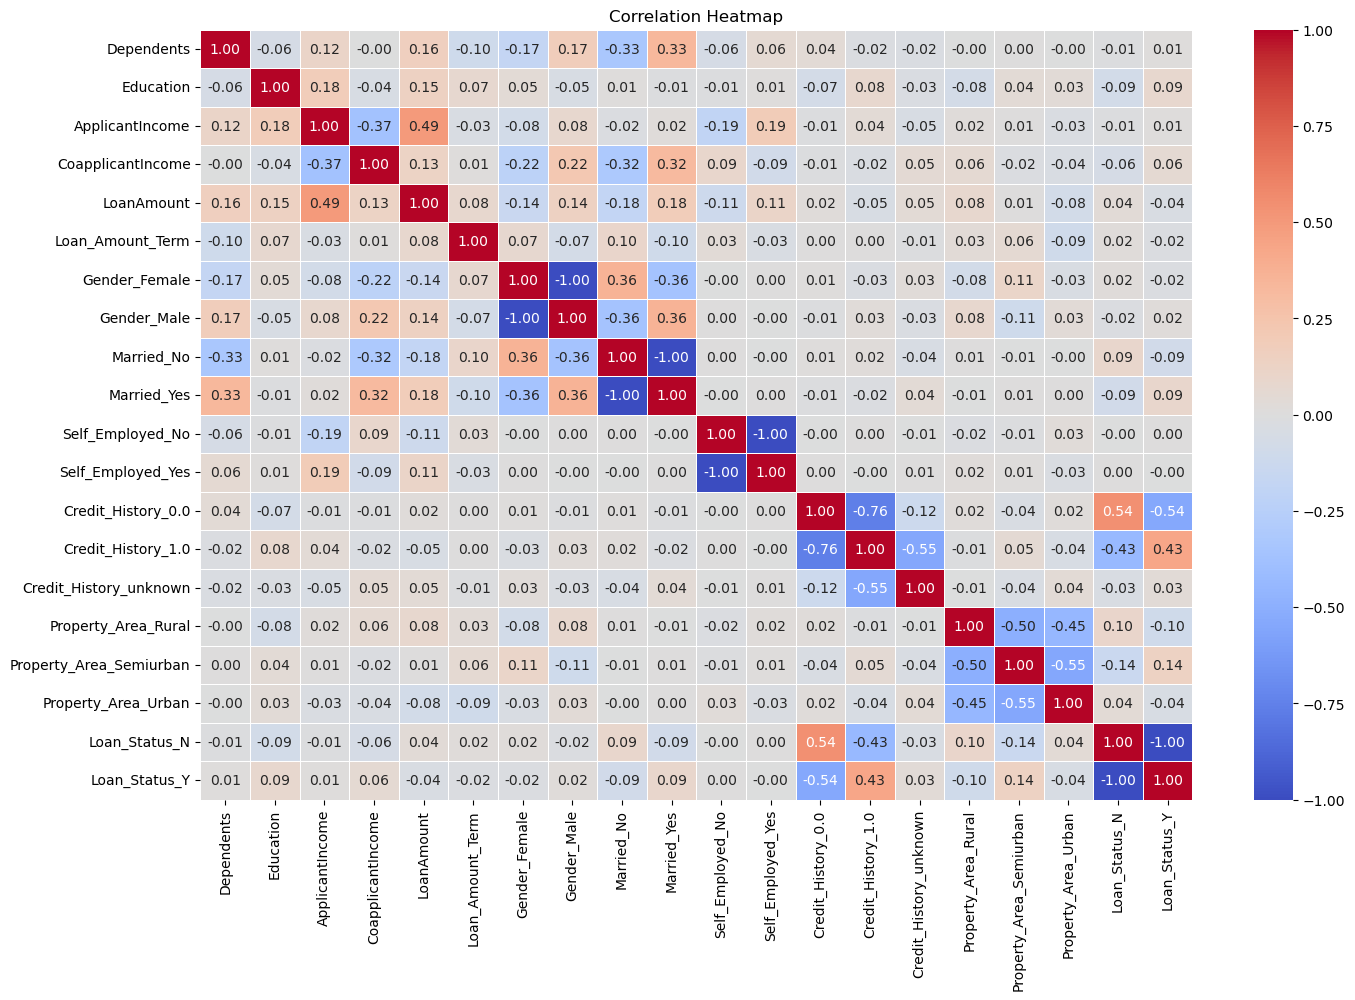

In [184]:
# Select only numeric columns (heatmap works with numbers only)
numeric_df = loan_eligibility_df.select_dtypes(include=['float64', 'int64'])
# 
# Calculate correlation matrix
corr_matrix = numeric_df.corr()
# 
# Plot the heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 2. Exploratory Data Analysis (EDA)

## 2.1. What is the overall loan approval rate?

In [185]:
# 
# Check the counts of Loan_Status_Y
ln_st_Y_counts = loan_eligibility_df['Loan_Status_Y'].value_counts()
# 
# Check the total rows of the DataFrame
entries = len(loan_eligibility_df)
# 
# Approval Rating = (No. of Loan_status_Y / Total rows in DataFrame) * 100
approval_rate = (ln_st_Y_counts / entries) * 100
print(f"\nOverall Loan Approval Rate: {approval_rate[1]:.2f}%")


Overall Loan Approval Rate: 68.73%


## 2.2.  Loan Approval by Gender, Credit History, Marital Status, etc.

### 2.2.1. Loan approval by gender

In [186]:
gender_m_approval_y_counts = loan_eligibility_df.groupby('Gender_Male')['Loan_Status_Y'].value_counts()
gender_m_approval_n_counts = loan_eligibility_df.groupby('Gender_Male')['Loan_Status_N'].value_counts()
gender_f_approval_y_counts = loan_eligibility_df.groupby('Gender_Female')['Loan_Status_Y'].value_counts()
gender_f_approval_n_counts = loan_eligibility_df.groupby('Gender_Female')['Loan_Status_N'].value_counts()
gender_m_approval_rate = (gender_m_approval_y_counts[1][1] / (gender_m_approval_y_counts[1][1] + gender_m_approval_n_counts[1][1])) * 100
gender_f_approval_rate = (gender_f_approval_y_counts[1][1] / (gender_f_approval_y_counts[1][1] + gender_f_approval_n_counts[1][1])) * 100

print(
f"""
    The male approval rating is: {gender_m_approval_rate:.2f}%
    The female approval rating is: {gender_f_approval_rate:.2f}%
"""
)


    The male approval rating is: 69.12%
    The female approval rating is: 66.96%



### 2.2.2. Impact of credit history on loan approval

In [187]:
credit_impact = loan_eligibility_df.groupby(['Credit_History_1.0', 'Credit_History_0.0', 'Credit_History_unknown'])['Loan_Status_Y'].mean()
known_cred_hist_imp = credit_impact[1][0][0] * 100
no_cred_hist_imp = credit_impact[0][1][0]  * 100
unknown_cred_hist_imp = credit_impact[0][0][1]  * 100
print(
    f"""
        When a lendee has a credit history, it has a {known_cred_hist_imp:.2f}% impact on loan eligibility.
        When a lendee has no credit history, it has a {no_cred_hist_imp:.2f}% impact on loan eligibility.
        When a lendee has unknown credit history, it has a {unknown_cred_hist_imp:.2f}% impact on loan eligibility.
    """
)


        When a lendee has a credit history, it has a 79.58% impact on loan eligibility.
        When a lendee has no credit history, it has a 7.87% impact on loan eligibility.
        When a lendee has unknown credit history, it has a 74.00% impact on loan eligibility.
    


### 2.2.3. Influence of marital status, education, and property area

In [188]:
married_approval = loan_eligibility_df.groupby(['Married_Yes', 'Married_No'])['Loan_Status_Y'].mean() * 100
married_y_approval = married_approval[1][0]
married_n_approval = married_approval[0][1]
print(
    f"""
        If the lendee is married, then it has a {married_y_approval:.2f}% impact on loan eligibility.
        If the lendee is not married, then it has a {married_n_approval:.2f}% impact on loan eligibility.
    """
)


        If the lendee is married, then it has a 71.82% impact on loan eligibility.
        If the lendee is not married, then it has a 62.91% impact on loan eligibility.
    


In [189]:
educated_approval = loan_eligibility_df.groupby(['Education'])['Loan_Status_Y'].mean() * 100
educated_grad_approval = educated_approval[1]
educated_not_approval = educated_approval[0]
print(
    f"""
        If the lendee is educated, then it has a {educated_grad_approval:.2f}% impact on loan eligibility.
        If the lendee is not educated, then it has a {educated_not_approval:.2f}% impact on loan eligibility.
    """
)


        If the lendee is educated, then it has a 70.83% impact on loan eligibility.
        If the lendee is not educated, then it has a 61.19% impact on loan eligibility.
    


In [190]:
property_area_approval = loan_eligibility_df.groupby(['Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban'])['Loan_Status_Y'].mean() * 100
property_area_urban_approval = property_area_approval[0][0][1]
property_area_semiurban_approval = property_area_approval[0][1][0]
property_area_rural_approval = property_area_approval[1][0][0]
print(
    f"""
        If the lendee's property is in the urban area, then it has a {property_area_urban_approval:.2f}% impact on loan eligibility.
        If the lendee's property is in the semiurban area, then it has a {property_area_semiurban_approval:.2f}% impact on loan eligibility.
        If the lendee's property is in the rural area, then it has a {property_area_rural_approval:.2f}% impact on loan eligibility.
    """
)


        If the lendee's property is in the urban area, then it has a 65.84% impact on loan eligibility.
        If the lendee's property is in the semiurban area, then it has a 76.82% impact on loan eligibility.
        If the lendee's property is in the rural area, then it has a 61.45% impact on loan eligibility.
    


## 2.3. Most Common Loan Amount Terms

In [191]:
most_common_l_a_t = loan_eligibility_df['Loan_Amount_Term'].mode()[0]
print(f"The most common loan amount term is: {most_common_l_a_t:.0f} months")

The most common loan amount term is: 360 months


## ??????????????????2.4.4. Income and Loan Amount trends among approved vs unapproved

# 3. Data Visualization & Storytelling

## 3.1. Bar plots for categorical (Gender, Education, etc.)

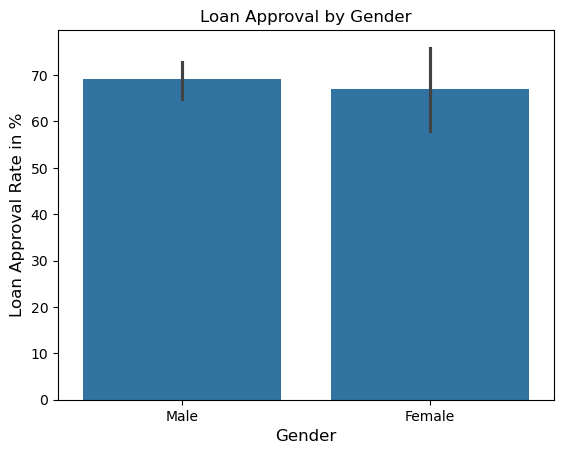

In [192]:
sns.barplot(
    x = loan_eligibility_df.assign(Gender=loan_eligibility_df['Gender_Female'].apply(lambda x: 'Female' if x == 1 else 'Male'))['Gender'],
    y = loan_eligibility_df['Loan_Status_Y'] * 100
)
plt.title('Loan Approval by Gender')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Loan Approval Rate in %', fontsize=12)   
plt.show()

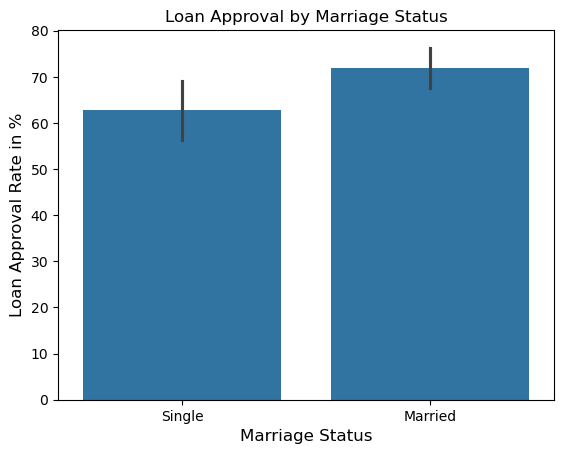

In [193]:
sns.barplot(
    x = loan_eligibility_df.assign(Married = loan_eligibility_df['Married_Yes'].apply(lambda x: 'Married' if x == 1 else 'Single'))['Married'],
    y = loan_eligibility_df['Loan_Status_Y'] * 100
)
plt.title('Loan Approval by Marriage Status')
plt.xlabel('Marriage Status', fontsize=12)
plt.ylabel('Loan Approval Rate in %', fontsize=12)   
plt.show()

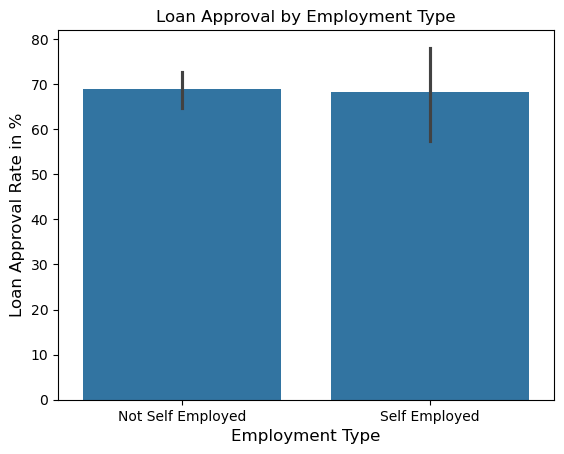

In [194]:
sns.barplot(
    x = loan_eligibility_df.assign(Employed = loan_eligibility_df['Self_Employed_Yes'].apply(lambda x: 'Self Employed' if x == 1 else 'Not Self Employed'))['Employed'],
    y = loan_eligibility_df['Loan_Status_Y'] * 100
)
plt.title('Loan Approval by Employment Type')
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Loan Approval Rate in %', fontsize=12)   
plt.show()

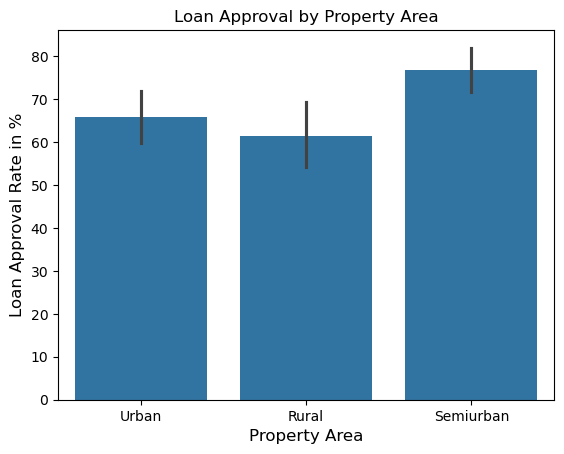

In [195]:
sns.barplot(
    x = loan_eligibility_df.assign(Property_Area = loan_eligibility_df.apply(lambda x: 'Urban' if x['Property_Area_Urban'] == 1 else ('Semiurban' if x['Property_Area_Semiurban'] == 1 else 'Rural'),
    axis=1))['Property_Area'],
    y = loan_eligibility_df['Loan_Status_Y'] * 100
)
plt.title('Loan Approval by Property Area')
plt.xlabel('Property Area', fontsize=12)
plt.ylabel('Loan Approval Rate in %', fontsize=12)   
plt.show()

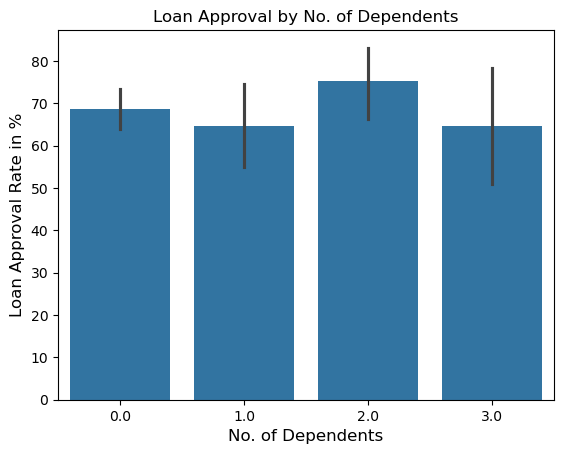

In [196]:
sns.barplot(
    data = loan_eligibility_df,
    x = loan_eligibility_df['Dependents'],
    y = loan_eligibility_df['Loan_Status_Y'] * 100
)
plt.title('Loan Approval by No. of Dependents')
plt.xlabel('No. of Dependents', fontsize=12)
plt.ylabel('Loan Approval Rate in %', fontsize=12)   
plt.show()

## 3.2. Box plots for numeric vs Loan_Status

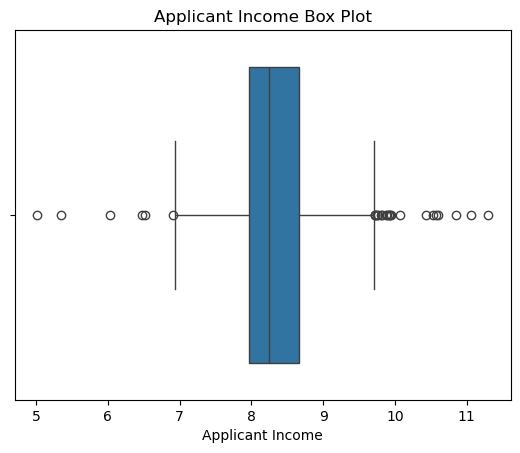

In [197]:
sns.boxplot(x='ApplicantIncome', data = loan_eligibility_df)
plt.title('Applicant Income Box Plot')
plt.xlabel('Applicant Income')
plt.show()

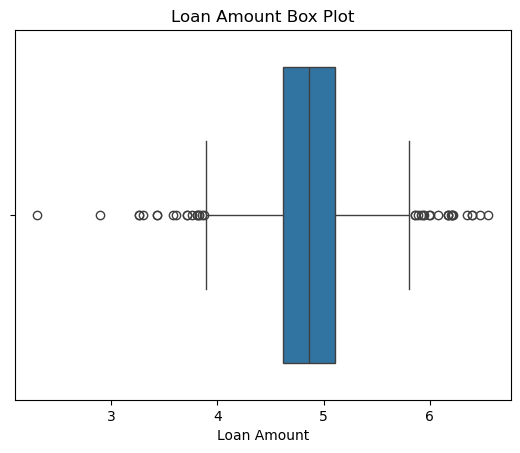

In [198]:
sns.boxplot(x='LoanAmount', data = loan_eligibility_df)
plt.title('Loan Amount Box Plot')
plt.xlabel('Loan Amount')
plt.show()

## 3.3. Insights Summary:

### 3.3.1. Who gets approved more?

### 3.3.2. Which segments should be targeted?

### 3.3.3. Any red flags?

# 4. Model Building

## 4.1. Split Dataset

In [199]:
# 
# Inputs (i.e., DataFrame has all columns apart from Loan_Status_Y and Loan_Status_N)
X = loan_eligibility_df.drop(['Loan_Status_Y', 'Loan_Status_N'], axis=1)
# 
# Predicted Output (Can use one i.e., Loan_Status_Y = 1 means accepted and Loan_Status_Y = 1 means rejected)
y = loan_eligibility_df['Loan_Status_Y']
# 
# Split the Data into 2 sets i.e., train data set is 80% of total
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 
# Initialize the Scaler Class
scaler = StandardScaler()
# 
# Standardize/Scale the input DataSet after splitting it
# Fit on training (i.e., compute the mean and standard deviation) only on X_train, not the whole dataset.transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
# 
# Don't fit the test DataSet to avoid data leakage that makes the model overly confident/optimistic
X_test_scaled = scaler.transform(X_test)

## 4.2. Train Models

In [200]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test) * 100
    print(f"{name} - Accuracy: {score:.2f}%")


Logistic Regression - Accuracy: 78.86%
Decision Tree - Accuracy: 73.17%
Random Forest - Accuracy: 75.61%


## 4.3. Evaluate Models

In [201]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

### 4.3.1. Confusion Matrix

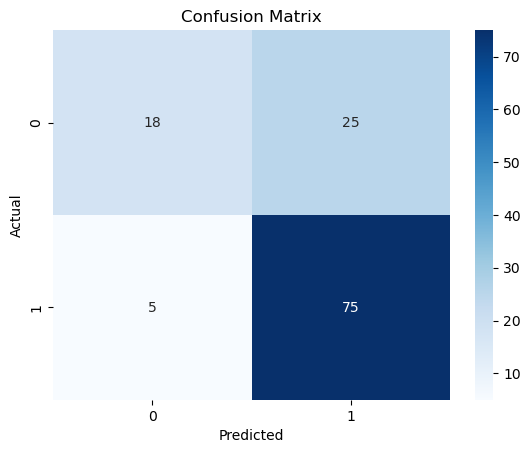

In [202]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 4.3.2. Classification Report

In [206]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



### 4.3.3. ROC Curve (Receiver Operating Characteristic)

C:\ProgramData\anaconda3\envs\loan_elig_env\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


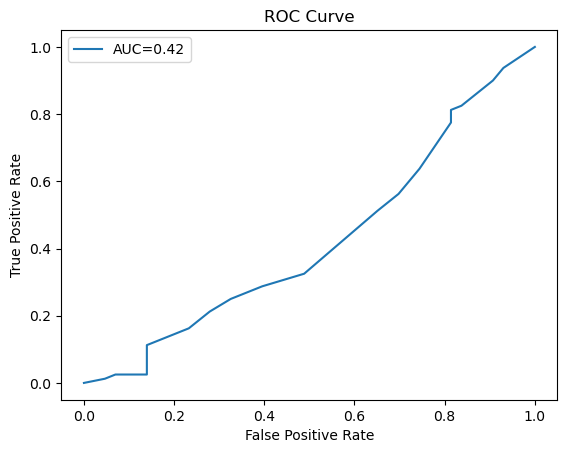

In [207]:
y_pred_proba = model.predict_proba(X_test)[::,1]  # probabilities for class 1
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="AUC="+str(round(auc, 2)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 5. Actionable Insights & Recommendations

## 5.1. Most Important Features 

## 5.2. Most Likely Profile to Get Approved

## 5.3. Recommendations

## 5.4. High-Level Deployment Plan